In [61]:
# On this process, we will load the chest X-ray data for the project.
# Import the following libraries and setups

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = os.path.abspath(os.getcwd()) + "\\chest_xray\\train"
CATEGORIES = ["Normal", "Bacteria", "Virus"]

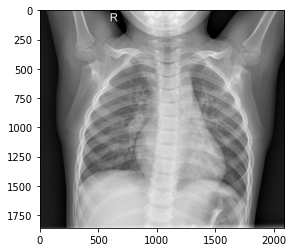

In [62]:
# Get the images from the categoric folders

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to each categories dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # save the images to img_array as grayscale
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [63]:
print(img_array)

[[ 22  24  24 ...  96  94  93]
 [ 23  24  24 ...  97  94  92]
 [ 24  24  23 ...  99  96  94]
 ...
 [ 49  50  48 ... 119 119 119]
 [ 50  52  53 ... 123 124 123]
 [ 52  53  54 ... 129 128 127]]


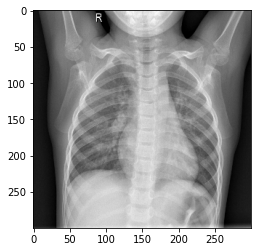

In [64]:
# Since the images' sizes are not coherent, we will set all of them (50, 50)

IMG_SIZE = 300

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [65]:
# We will now start working on training data
training_data = []

# Make a function to get the images from the categoric folders
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to each categories dir
        class_num = CATEGORIES.index(category) # for sorting categories
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # save the images to img_array as grayscale
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) # set all of them (50, 50)
                training_data.append([new_array, class_num])
            except Exception as e:
                pass # usually checks the errors but now just passing

# Before creating the training data, we want to make the ratio of each categories' file to be same
create_training_data()

In [66]:
print(len(training_data))

4023


In [67]:
# Shuffling the training data
import random

random.shuffle(training_data)

In [68]:
for sample in training_data[:10]:
    print(sample[1])

0
2
0
1
1
2
0
1
1
1


In [69]:
# Extorting features and label from the training data
X = []
y = []

In [70]:
for features, label in training_data:
    X.append(features)
    y.append(label)

# In order to use Keras neural network, we need to change X(features) to numpy array
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # 1 is for the images being grayscale. If using RGB, use 3

In [71]:
# pickle is for saving/loading the data when tweaking is needed.
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [27]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [28]:
pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)